<h1>Transistor as amplifier</h1>

<h2>Data in table</h2>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
Vin = 0.04
df = pd.read_csv('data.csv')

logf = np.log10(df['Frequency(Hz)'])
gain = 20 * np.log10(df['Output voltage(V)']/Vin)

df.insert(1, 'log f', logf)
df.insert(3, 'Voltage gain(dB)', gain)

In [27]:
df.head()

,Frequency(Hz),log f,Output voltage(V),Voltage gain(dB)
0,100,2.000000,0.16,12.041200
1,500,2.698970,0.48,21.583625
2,1000,3.000000,0.92,27.234557
3,2000,3.301030,1.70,32.567779
4,3000,3.477121,2.20,34.807254


<h2>Plotting the bode plot</h2>

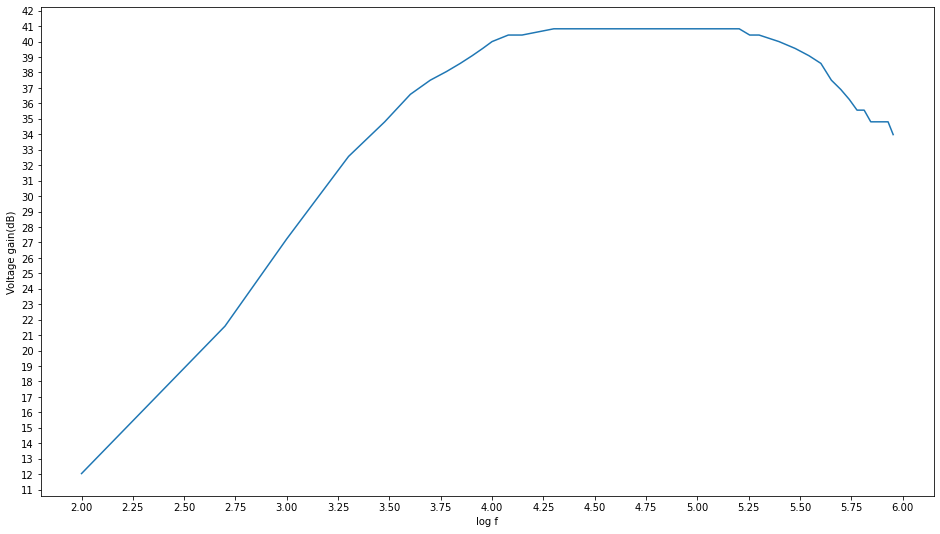

In [29]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(9)
x = np.arange(2,6.25,0.25)
y = np.arange(10,45,1)
plt.xticks(x)
plt.yticks(y)

plt.plot(df['log f'], df['Voltage gain(dB)'])
plt.xlabel('log f')
plt.ylabel('Voltage gain(dB)')
plt.show()